#E2 Proyecto Aprendizaje no supervisado

Santiago Juárez Roaro | A01705439

Adrián Mateos Garza | A01722496

Antonio Pena Lozano | A01722688

Miguel Ángel González | A01198604

In [ ]:
!pip3 install -U ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from ucimlrepo import fetch_ucirepo, list_available_datasets
import seaborn as sns
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (14, 7)
plt.style.use('ggplot')

from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture

In [ ]:
df=pd.read_csv('/content/databi.csv')
df=df.rename(columns={'0':'Obesity_Level'})
df_cols=df.columns
df.head()

,Gender_Female,Gender_Male,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,...,SCC,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transport,MTRANS_Walking,Obesity_Level
0,1.0,0.0,21.0,1.62,64.0,1.0,0.0,2.0,3.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,21.0,1.52,56.0,1.0,0.0,3.0,3.0,1.0,...,1.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,23.0,1.80,77.0,1.0,0.0,2.0,3.0,1.0,...,0.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,27.0,1.80,87.0,0.0,0.0,3.0,3.0,1.0,...,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,5.0
4,0.0,1.0,22.0,1.78,89.8,0.0,0.0,2.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6.0


In [ ]:
df.columns

Index(['Gender_Female', 'Gender_Male', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transport',
       'MTRANS_Walking', 'Obesity_Level'],
      dtype='object')

In [ ]:
df.shape

(2111, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender_Female                   2111 non-null   float64
 1   Gender_Male                     2111 non-null   float64
 2   Age                             2111 non-null   float64
 3   Height                          2111 non-null   float64
 4   Weight                          2111 non-null   float64
 5   family_history_with_overweight  2111 non-null   float64
 6   FAVC                            2111 non-null   float64
 7   FCVC                            2111 non-null   float64
 8   NCP                             2111 non-null   float64
 9   CAEC                            2111 non-null   float64
 10  SMOKE                           2111 non-null   float64
 11  CH2O                            2111 non-null   float64
 12  SCC                             21

In [ ]:
df.describe(include=['float64'])

,Gender_Female,Gender_Male,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,...,SCC,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transport,MTRANS_Walking,Obesity_Level
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,...,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.494079,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.140692,...,0.045476,1.010298,0.657866,0.731407,0.216485,0.003316,0.005211,0.748460,0.026528,3.015632
std,0.500083,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,...,0.208395,0.850592,0.608927,0.515498,0.411946,0.057502,0.072015,0.434001,0.160737,1.952090
min,0.000000,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,1.000000,...,0.000000,0.124505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,1.000000,...,0.000000,1.000000,0.625350,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000
75%,1.000000,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,1.000000,...,0.000000,1.666678,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000
max,1.000000,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,...,1.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


In [ ]:
df.isnull().sum()

Gender_Female                     0
Gender_Male                       0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS_Automobile                 0
MTRANS_Bike                       0
MTRANS_Motorbike                  0
MTRANS_Public_Transport           0
MTRANS_Walking                    0
Obesity_Level                     0
dtype: int64

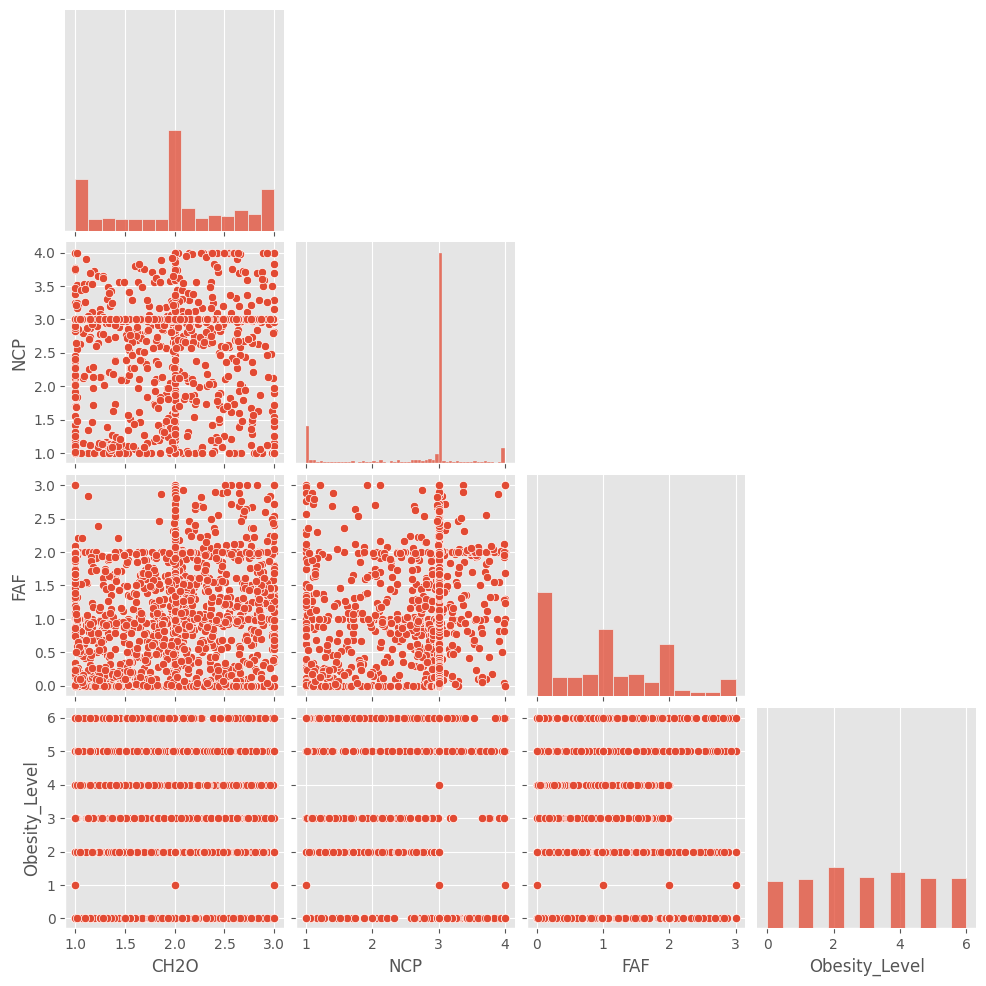

In [ ]:
#Elejimos la cantidad de agua ingerida por día, frecuencia de actividad física y el nivel de obesidad para ver posbiles relaciones
sns.pairplot(df[["CH2O",'NCP','FAF','Obesity_Level']],corner=True)

## K means

In [ ]:
df['Obesity_Level']

0       1.0
1       1.0
2       1.0
3       5.0
4       6.0
       ... 
2106    4.0
2107    4.0
2108    4.0
2109    4.0
2110    4.0
Name: Obesity_Level, Length: 2111, dtype: float64

In [ ]:
X=np.array(df.drop(['Obesity_Level'],axis=1))
y=np.array(df['Obesity_Level'].astype('int'))

In [ ]:
#Número óptimo de clusters
n=range(1,15)
kmeans=[KMeans(n_clusters=i,n_init='auto') for i in n]
score=[kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score


[-1540957.1067101075,
 -502930.17763160204,
 -281943.3600847781,
 -238184.69373461697,
 -159220.38980510973,
 -125892.70980313048,
 -99603.39053954136,
 -89851.78296018697,
 -81339.96817217597,
 -74482.88259273891,
 -67995.80250679693,
 -68735.8753292224,
 -60470.960014802215,
 -53432.897348450904]

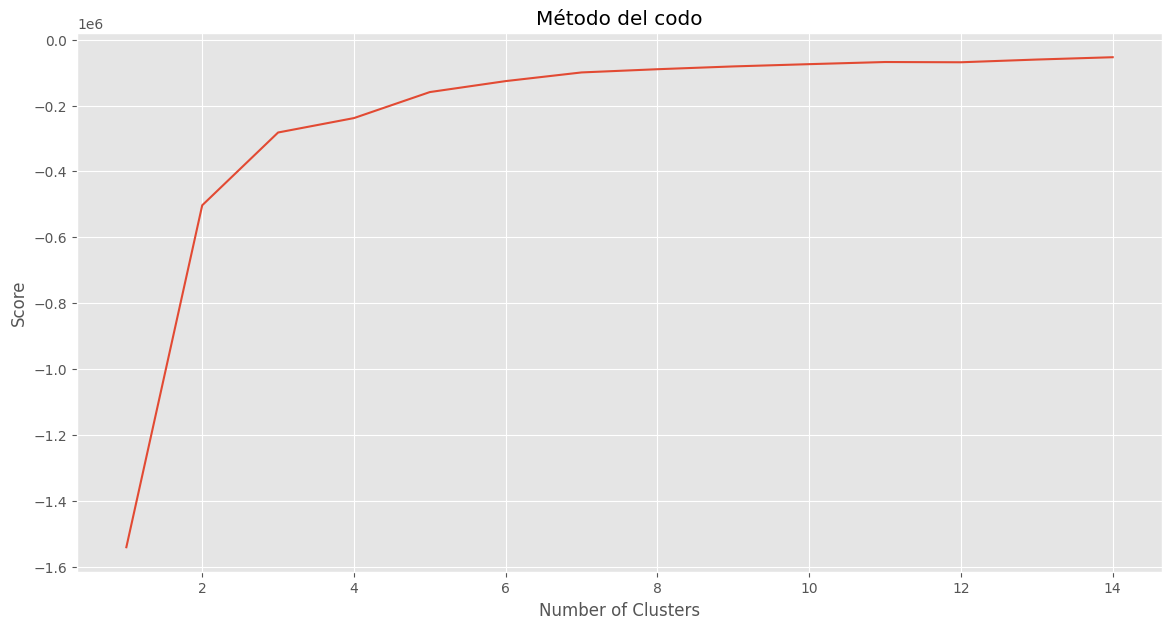

In [ ]:
plt.plot(n,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Método del codo')
plt.show()

**Número óptimo de clusters : 7**

In [ ]:
#Centros de los clusters
kmeans=KMeans(n_clusters=7)
kmeans.fit(X)
centroids=kmeans.cluster_centers_
centroids

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[ 3.72727273e-01,  6.27272727e-01,  2.21416381e+01,
         1.71610281e+00,  8.25154076e+01,  9.11363636e-01,
         8.88636364e-01,  2.25147798e+00,  2.51793649e+00,
         1.11136364e+00,  1.59090909e-02,  2.06463077e+00,
         2.72727273e-02,  1.10705112e+00,  7.03183907e-01,
         7.45454545e-01,  1.40909091e-01,  4.54545455e-03,
         4.54545455e-03,  8.18181818e-01,  3.18181818e-02],
       [ 8.87417219e-01,  1.12582781e-01,  2.16209796e+01,
         1.77091033e+00,  1.36575212e+02,  1.00000000e+00,
         9.93377483e-01,  2.92851268e+00,  3.00000000e+00,
         1.00662252e+00,  3.97350993e-02,  2.15993793e+00,
         1.17961196e-16,  1.43233860e+00,  7.58869848e-01,
         1.00000000e+00,  6.62251656e-03, -9.54097912e-18,
        -1.64798730e-17,  9.93377483e-01, -7.63278329e-17],
       [ 5.05847953e-01,  4.94152047e-01,  2.13145517e+01,
         1.66523250e+00,  6.50357748e+01,  6.34502924e-01,
         7.36842105e-01,  2.33405114e+00,  2.61907318e

In [ ]:
labels=kmeans.predict(X)
centers=kmeans.cluster_centers_
colors=['red','green','blue','yellow','orange','purple','pink']

asignation=[]
for label in labels:
  asignation.append(colors[label])


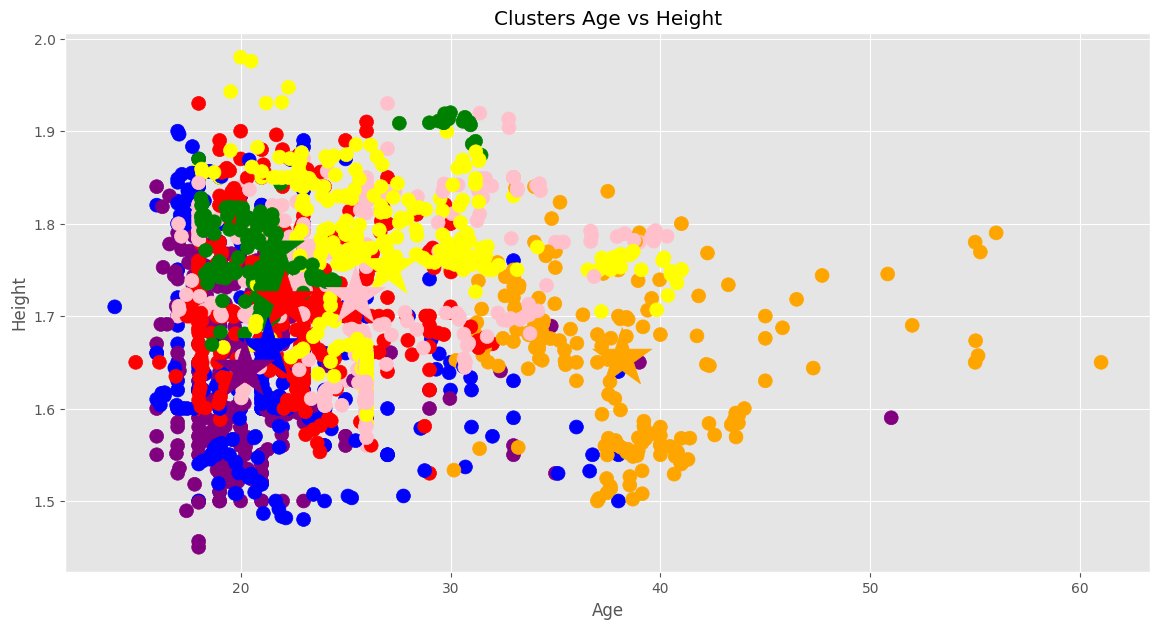

In [ ]:
fig=plt.figure()
x=X[:,2]
y=X[:,3]

plt.scatter(x,y,c=asignation,s=100)
plt.scatter(centers[:,2],centers[:,3],c=colors,s=2000,marker='*')
plt.xlabel(df.columns[2])
plt.ylabel(df.columns[3])
plt.title(f'Clusters {df.columns[2]} vs {df.columns[3]}')
plt.show()

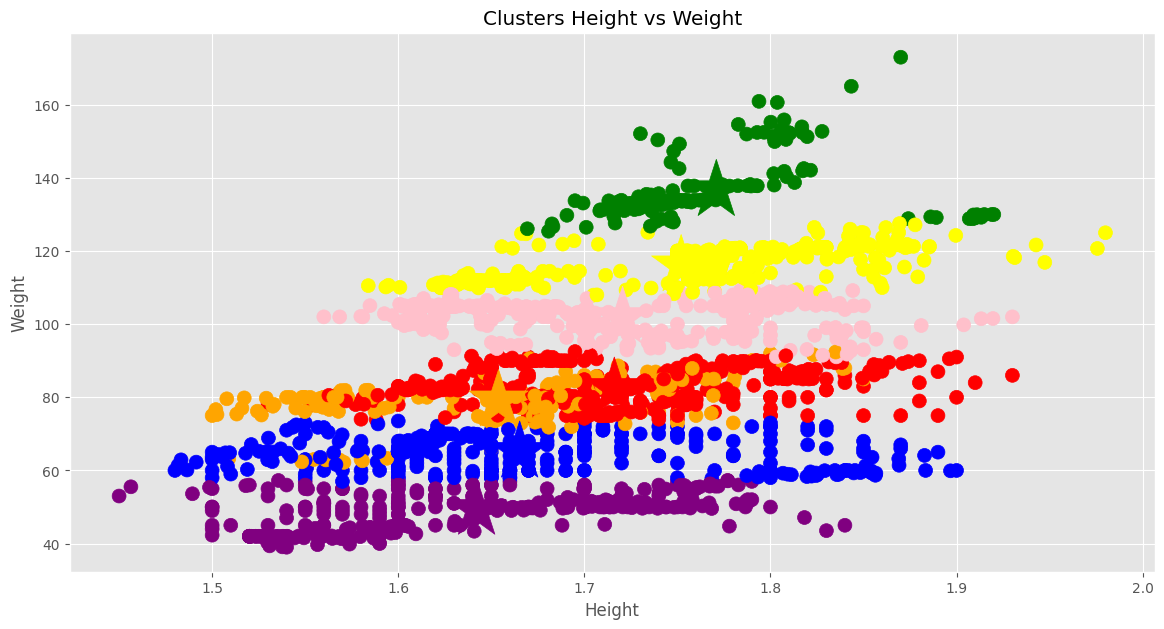

In [ ]:
fig=plt.figure()
x=X[:,3]
y=X[:,4]

plt.scatter(x,y,c=asignation,s=100)
plt.scatter(centers[:,3],centers[:,4],c=colors,s=2000,marker='*')
plt.xlabel(df.columns[3])
plt.ylabel(df.columns[4])
plt.title(f'Clusters {df.columns[3]} vs {df.columns[4]}')
plt.show()

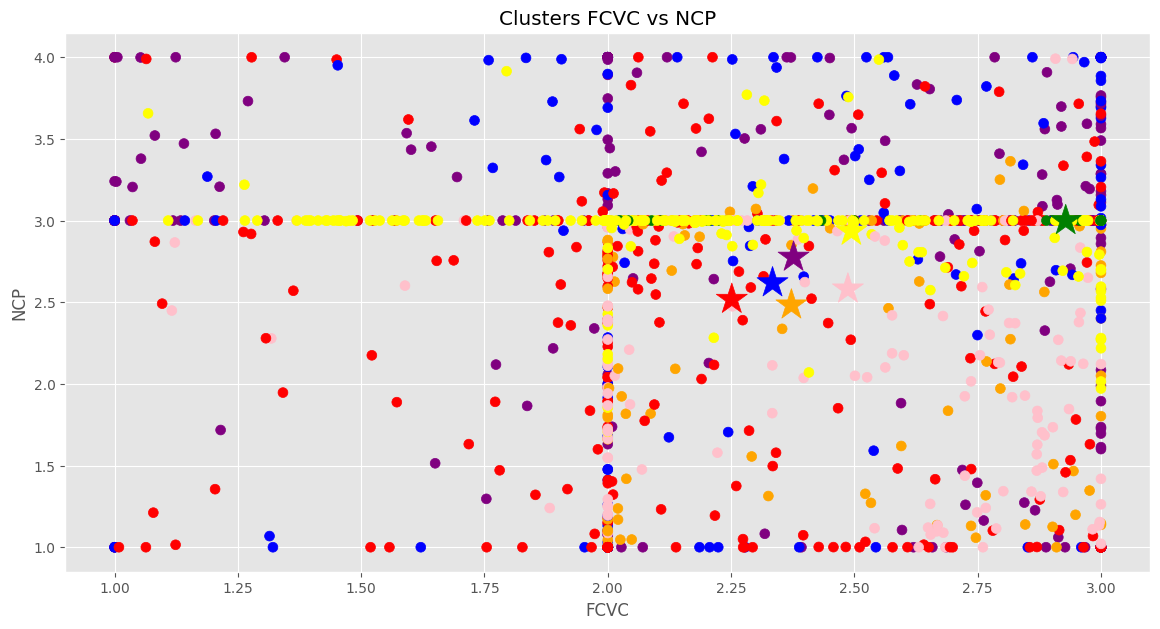

In [ ]:
fig=plt.figure()
x=X[:,7]
y=X[:,8]

plt.scatter(x,y,c=asignation,s=50)
plt.scatter(centers[:,7],centers[:,8],c=colors,s=550,marker='*')
plt.xlabel(df.columns[7])
plt.ylabel(df.columns[8])
plt.title(f'Clusters {df.columns[7]} vs {df.columns[8]}')
plt.show()

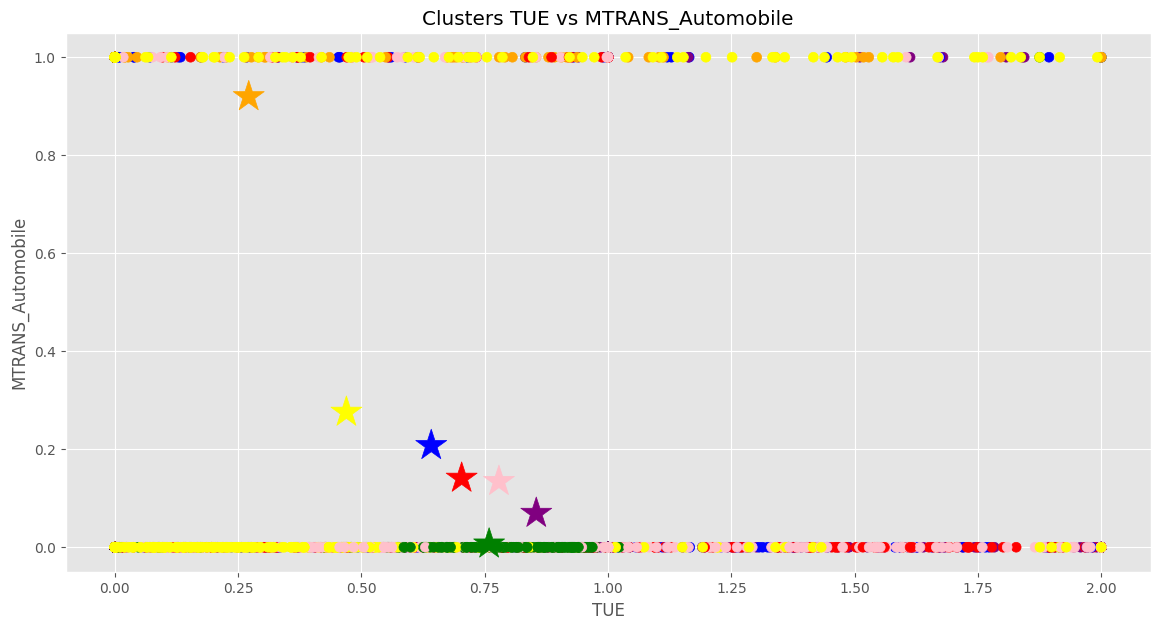

In [ ]:
fig=plt.figure()
x=X[:,14]
y=X[:,16]

plt.scatter(x,y,c=asignation,s=50)
plt.scatter(centers[:,14],centers[:,16],c=colors,s=550,marker='*')
plt.xlabel(df.columns[14])
plt.ylabel(df.columns[16])
plt.title(f'Clusters {df.columns[14]} vs {df.columns[16]}')
plt.show()

In [ ]:
X=pd.DataFrame(X)
X['Labels']=labels
X.columns=df_cols
X.rename(columns={'Obesity_Level':'Cluster'},inplace=True)
X.head()


,Gender_Female,Gender_Male,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,...,SCC,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transport,MTRANS_Walking,Cluster
0,1.0,0.0,21.0,1.62,64.0,1.0,0.0,2.0,3.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2
1,1.0,0.0,21.0,1.52,56.0,1.0,0.0,3.0,3.0,1.0,...,1.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5
2,0.0,1.0,23.0,1.80,77.0,1.0,0.0,2.0,3.0,1.0,...,0.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0
3,0.0,1.0,27.0,1.80,87.0,0.0,0.0,3.0,3.0,1.0,...,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0
4,0.0,1.0,22.0,1.78,89.8,0.0,0.0,2.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0


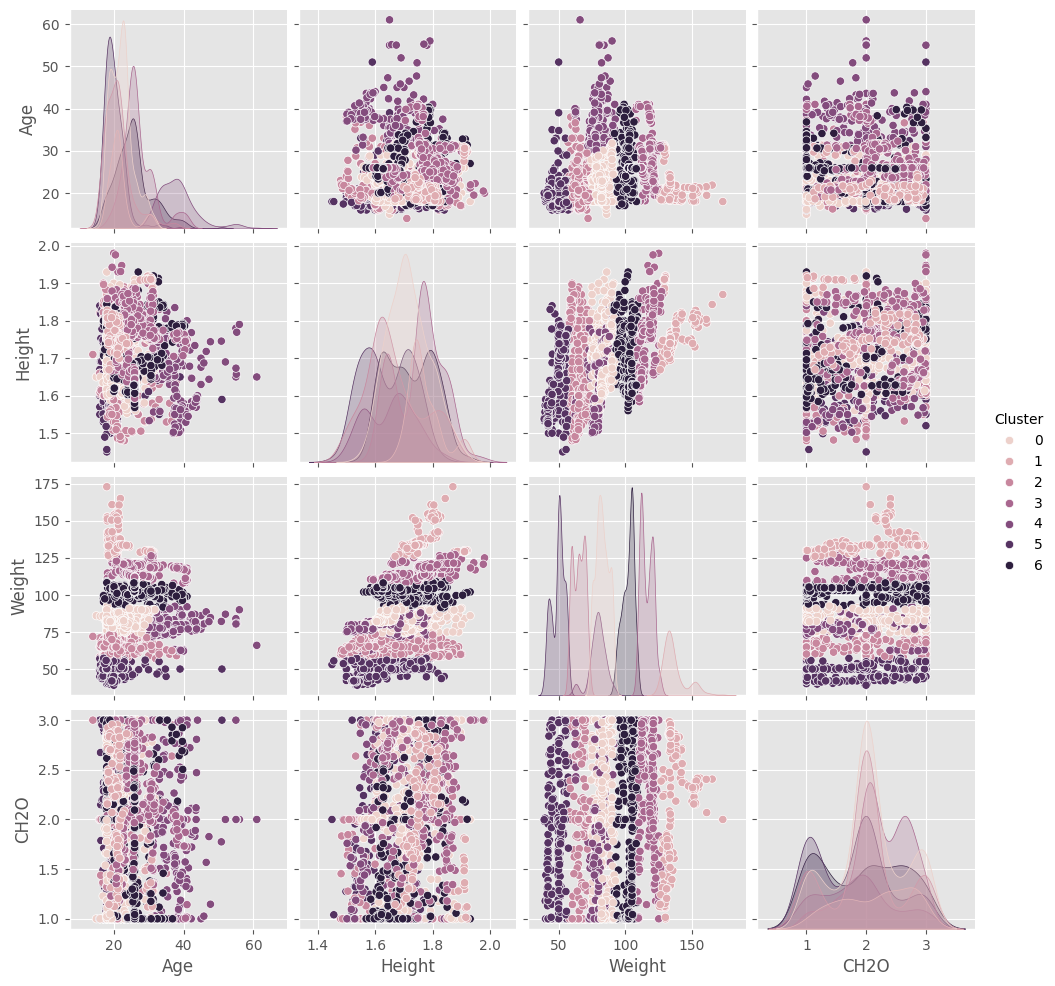

In [ ]:
sns.pairplot(data=X,hue='Cluster',vars=['Age','Height','Weight','CH2O'])

###Observaciones generales

En general, los 7 clusters fueron suficientes para hacer agrupaciones medianamente precisas ya que en la algunas de las gráfica se nota ver las agrupaciones marcadas de manera correcta aunque probablemente por la complejidad del dataset no en todos los casos se agrupa de manera correcta como lo es en TUE vs Transporte en Automobil. También hay que tomar en cuenta que algunas variables estan codificadas como lo son los métodos de transporte, género y familiares con historial de obesidad.


In [ ]:
#Comparación de hiperparámetros
init=['k-means++','random']
ks=[5,10,15,20,25]
max=[300,500,700]

results=[]
for i in init:
  for k in ks:
    for m in max:
      kmeans=KMeans(n_clusters=k,init=i,max_iter=m,n_init='auto')
      kmeans.fit(X)
      labels=kmeans.predict(X)

      results.append({
            'n_clusters': k,
            'init': i,
            'max_iter': m,
            'silhouette_score': silhouette_score(X, labels)
        })


In [ ]:
result = pd.DataFrame(results)
result.head()

,n_clusters,init,max_iter,silhouette_score
0,5,k-means++,300,0.432539
1,5,k-means++,500,0.426382
2,5,k-means++,700,0.426382
3,10,k-means++,300,0.388940
4,10,k-means++,500,0.378202


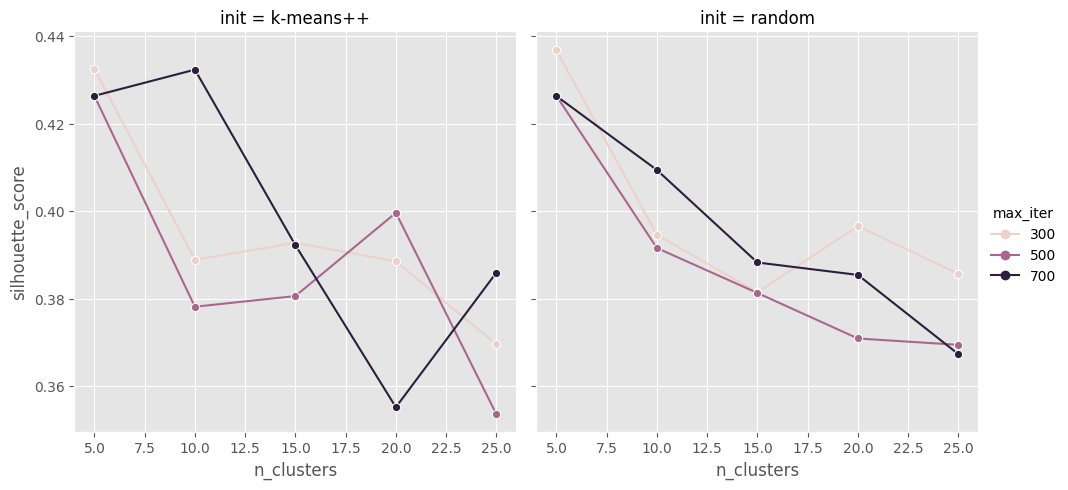

In [ ]:
sns.relplot(data=result,x='n_clusters',y='silhouette_score',hue='max_iter',marker='o',kind='line',errorbar=None,col='init')

##Observaciones de los parámetros

Notamos que de los parámetros escogidos, la mejor combinación fue un número de clusters de 5, iteración máxima de 300 y el init de k-means ++, aunque notamos una fuerte pérdida de precisión al momento de aumentar los clusters, comportamiento que no se ve en una iteración máxima de 500, la cual con un número de 10 clusters aumenta más la precisión de modelo pero luego cae. En el caso de 700 iteraciones también decae conforme se aumenta el número de clusters pero llega un punto donde aumenta un poco y vuelve a caer, por ahí de los 20 clusters.

## Modelo de Mezcla Gaussiana



In [ ]:
df.head(3)

,Gender_Female,Gender_Male,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,...,SCC,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transport,MTRANS_Walking,Obesity_Level
0,1.0,0.0,21.0,1.62,64.0,1.0,0.0,2.0,3.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,21.0,1.52,56.0,1.0,0.0,3.0,3.0,1.0,...,1.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,23.0,1.80,77.0,1.0,0.0,2.0,3.0,1.0,...,0.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
X=np.array(df.drop(['Obesity_Level'],axis=1))
y=np.array(df['Obesity_Level'].astype('int'))

In [ ]:
X.shape

(2111, 21)

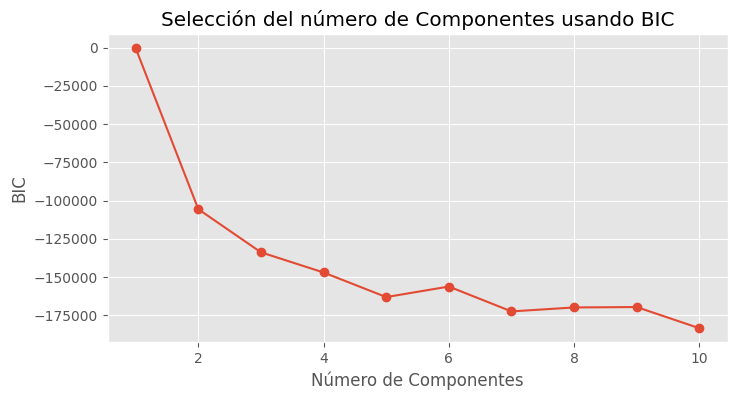

In [ ]:
# Usar BIC para seleccionar el número de componentes
bic = []
n_components = range(1, 11)

for n in n_components:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X)
    bic.append(gmm.bic(X))

# Graficar BIC vs número de componentes
plt.figure(figsize=(8, 4))
plt.plot(n_components, bic, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('BIC')
plt.title('Selección del número de Componentes usando BIC')
plt.show()

<Figure size 800x800 with 0 Axes>

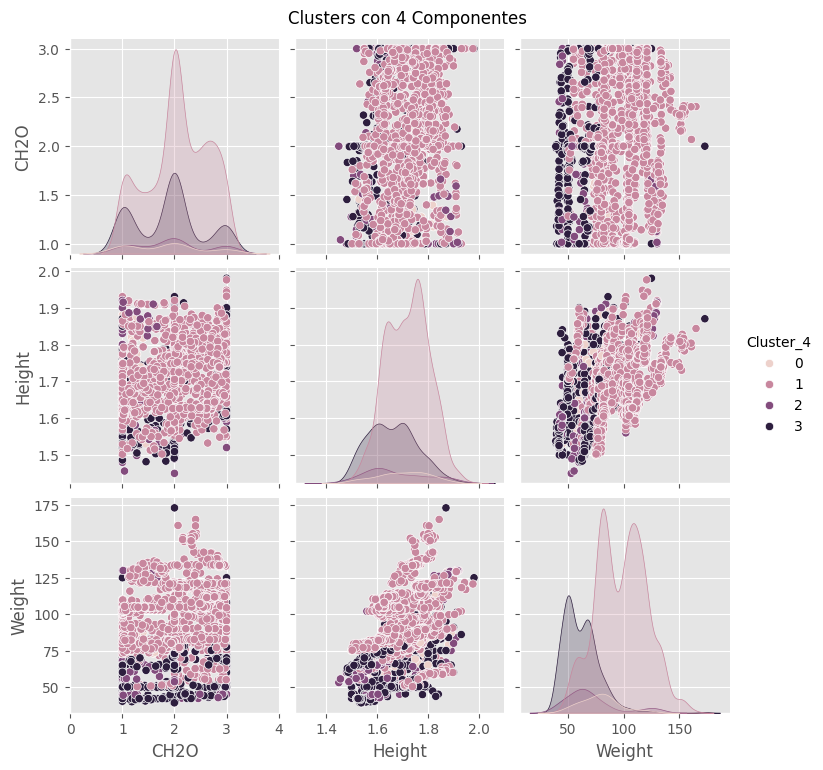

In [ ]:
# El punto codo esta en alrededor de las 4 componentes. Mientras que el punto mas bajo es el de 10 Componentes.

# Ajuste del modelo GMM con 4 componentes
gmm_4 = GaussianMixture(n_components=4, random_state=420)
gmm_4.fit(X)
labels_4 = gmm_4.predict(X)

# Ajuste del modelo GMM con 10 componentes
gmm_10 = GaussianMixture(n_components=10, random_state=420)
gmm_10.fit(X)
labels_10 = gmm_10.predict(X)

# Añadir las etiquetas de los clusters al dataframe original
df['Cluster_4'] = labels_4
df['Cluster_10'] = labels_10

# Visualización de los clusters
plt.figure(figsize=(8, 8))
sns.pairplot(df, hue='Cluster_4', diag_kind='kde', vars=['CH2O', 'Height', 'Weight'])
plt.suptitle('Clusters con 4 Componentes', y=1.02)
plt.show()

<Figure size 800x800 with 0 Axes>

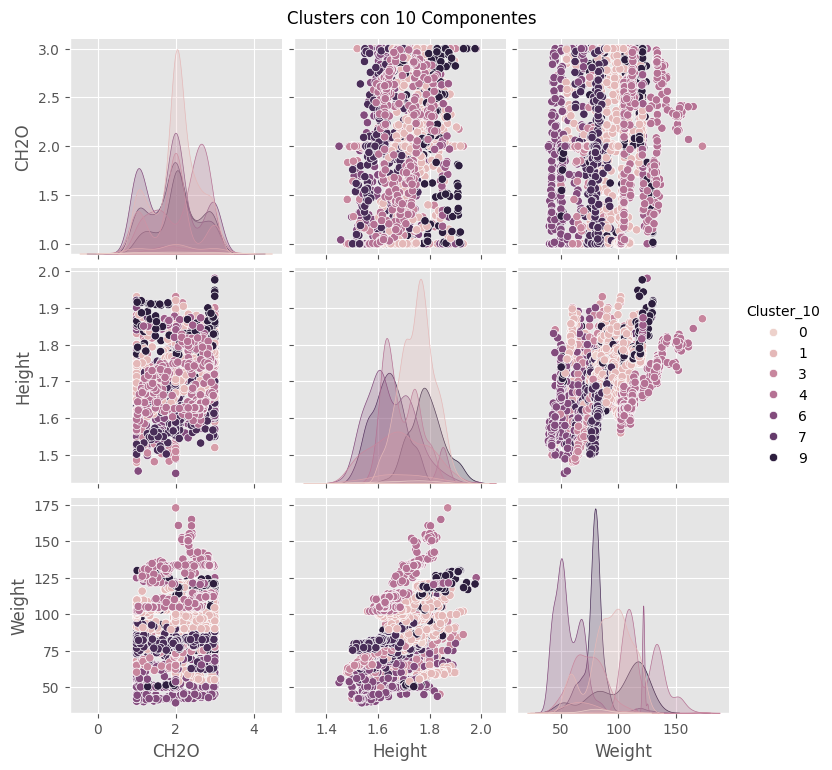

In [ ]:
plt.figure(figsize=(8, 8))
sns.pairplot(df, hue='Cluster_10', diag_kind='kde', vars=['CH2O', 'Height', 'Weight'])
plt.suptitle('Clusters con 10 Componentes', y=1.02)
plt.show()

### Clustering con 4 Componentes
Observaciones Generales:
CH2O vs Height: La mayoría de los puntos están distribuidos de manera uniforme en el rango de consumo de agua. Hay una mayor densidad de puntos en torno a los valores medios de altura (1.6 - 1.8 m).

CH2O vs Weight: Los puntos están agrupados principalmente en dos bandas horizontales, lo que sugiere dos grupos de individuos con diferente peso pero similar consumo de agua.

Height vs Weight: Los clusters muestran una superposición significativa, especialmente entre los clusters 0, 1 y 2.\
Cluster 0: Parece incluir individuos con altura y peso medios. \
Cluster 1: Es el grupo mas disperso, tienden a tener un mayor peso. \
Cluster 2: Incluye individuos con mayor altura y peso de medio a bajo. \
Cluster 3: Son individuos que tienden a tener un menor peso y altura.

### Clustering con 10 Componentes
CH2O vs Height: Los clusters están más segmentados, mostrando subgrupos más definidos dentro del rango de consumo de agua y altura.\
CH2O vs Weight: La segmentación es más evidente, con varios clusters formando bandas horizontales y diferenciando más claramente el peso, el consumo de agua no parece estar segmentado de forma tan evidente.\
Height vs Weight: Los clusters que están mejor separados, especialmente los clusters que corresponden a individuos con pesos significativamente diferentes.\

Cluster 0, 1, 3, 4, 6, 7, 9: Cada uno de estos clusters parece capturar subgrupos específicos con combinaciones particulares de altura y peso.\
Cluster 1: Parece incluir individuos la mayor altura y peso medio/bajo.\
Cluster 6: Parece ser el cluster con menor consumo de agua.
Cluster 9: Incluye los individuos con el mayor peso, destacándose en el rango de 100 a 150 kg y altura baja a media (150cm - 180cm)


### **Seleccion**:
El modelo con 4 componentes es más simple y se piensa que es suficiente ya que el objetivo es una clasificación más general. Este modelo aún proporciona una buena segmentación y puede ser más fácil de interpretar y comunicar.

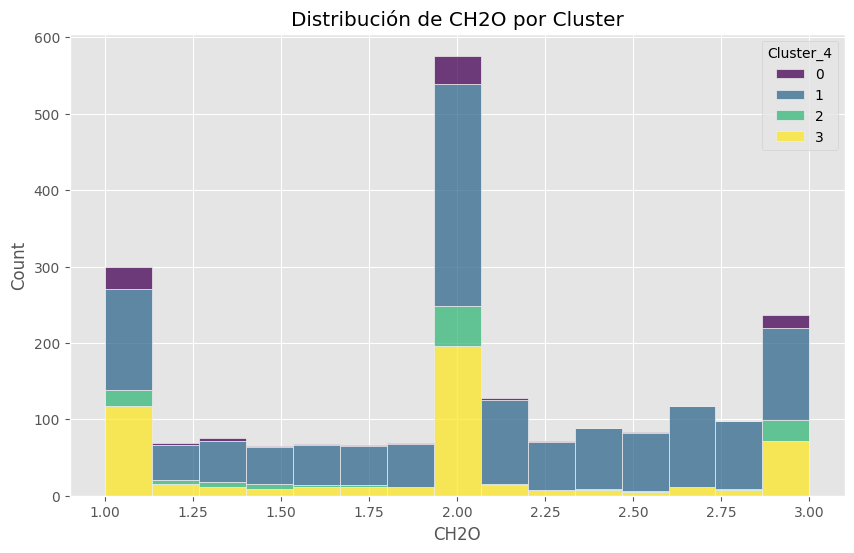

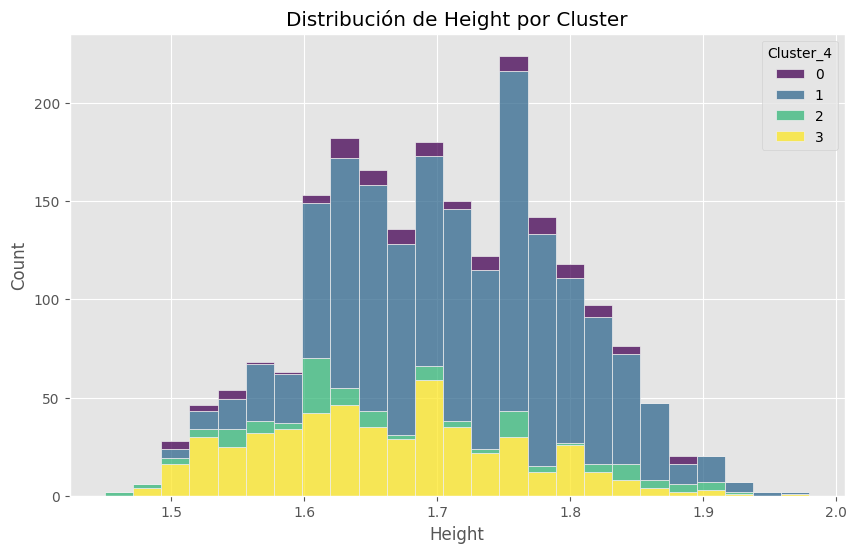

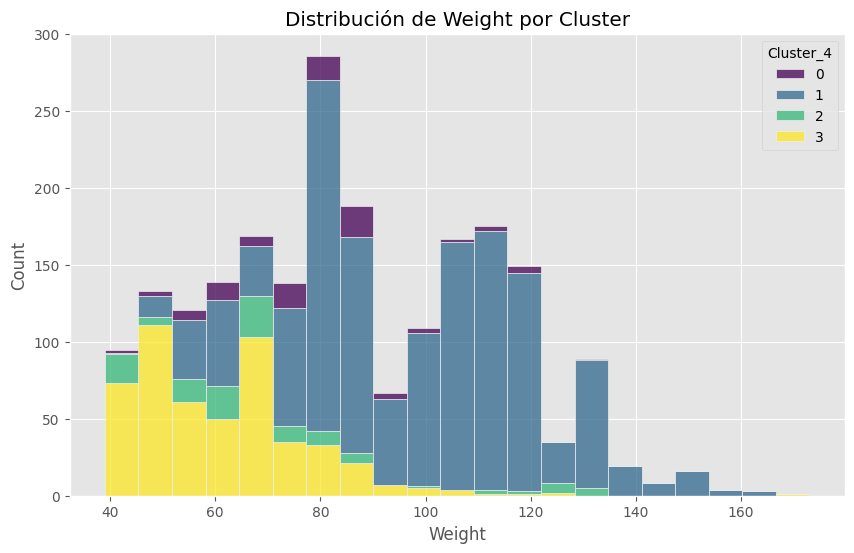

In [ ]:
# Histogramas de las variables principales por cluster

for feature in ['CH2O', 'Height', 'Weight']:
    plt.figure(figsize=(10, 6))
    sns.histplot(df, x=feature, hue='Cluster_4', multiple='stack', palette='viridis')
    plt.title(f'Distribución de {feature} por Cluster')
    plt.show()

<ipython-input-34-b87ec63088d3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_4', y=feature, data=df, palette='viridis')


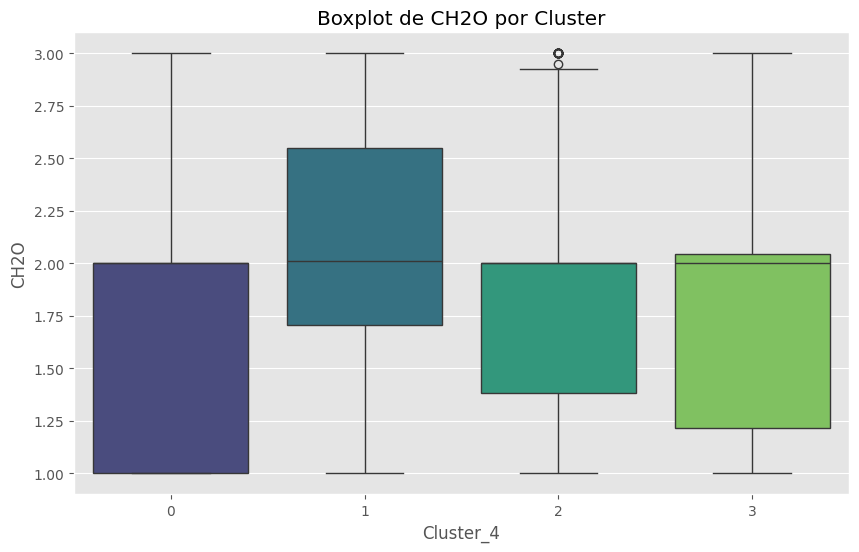

<ipython-input-34-b87ec63088d3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_4', y=feature, data=df, palette='viridis')


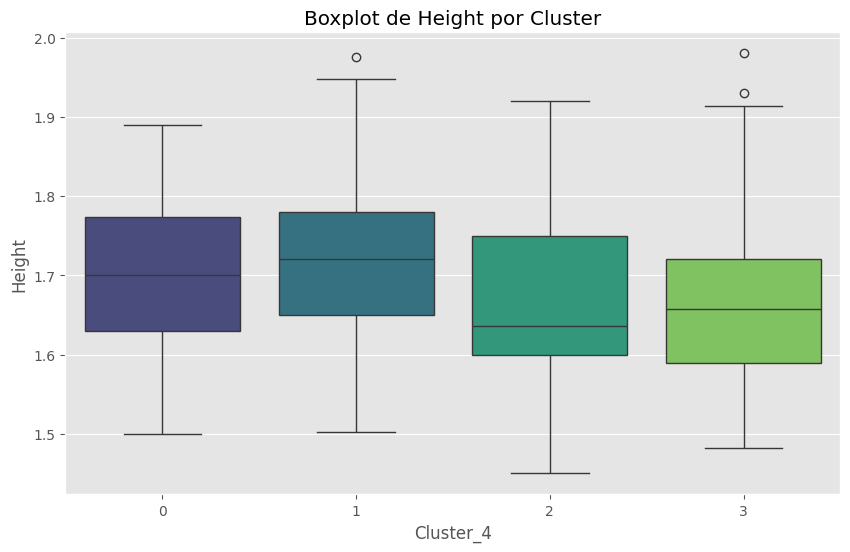

<ipython-input-34-b87ec63088d3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_4', y=feature, data=df, palette='viridis')


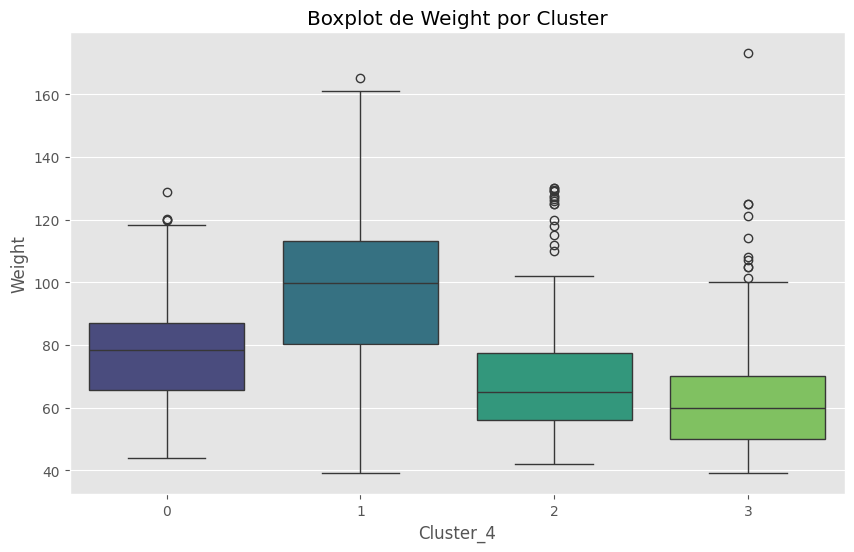

In [ ]:
# Boxplots de las variables principales por cluster
for feature in ['CH2O', 'Height', 'Weight']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster_4', y=feature, data=df, palette='viridis')
    plt.title(f'Boxplot de {feature} por Cluster')
    plt.show();

In [ ]:
# Experimentacion con distintos hiperparametros
# Los hiperparámetros comunes para GMM son el numero de componentes y el tipo de covarianza
n_components_range = range(2, 11)
covariance_types = ['full', 'tied', 'diag', 'spherical']


In [ ]:
results = []

for n_components in n_components_range:
    for covariance_type in covariance_types:
        # Crear y ajustar el modelo GMM
        gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=42)
        gmm.fit(X)
        labels = gmm.predict(X)

        # Calcular el índice de silueta
        silhouette_avg = silhouette_score(X, labels)

        # Guardar los resultados
        results.append({
            'n_components': n_components,
            'covariance_type': covariance_type,
            'silhouette_score': silhouette_avg
        })


In [ ]:
results_df = pd.DataFrame(results)
results_df.head()

,n_components,covariance_type,silhouette_score
0,2,full,0.279339
1,2,tied,0.516990
2,2,diag,0.279339
3,2,spherical,0.569125
4,3,full,0.103970


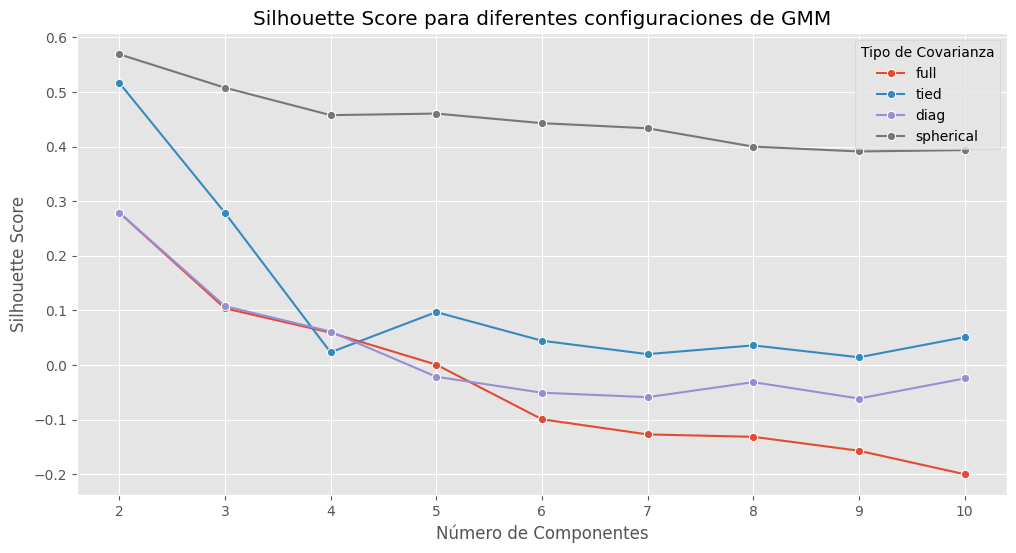

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df, x='n_components', y='silhouette_score', hue='covariance_type', marker='o')
plt.title('Silhouette Score para diferentes configuraciones de GMM')
plt.xlabel('Número de Componentes')
plt.ylabel('Silhouette Score')
plt.legend(title='Tipo de Covarianza')
plt.show()

Covarianza Spherical:
La covarianza spherical fue la más estable y proporcionó los valores de Silhouette Score más altos (máximo de alrededor de 0.57 y mínimo de 0.4).
Esto sugiere que una estructura esférica de covarianza captura mejor la forma de los clusters, proporcionando una buena separación.

Covarianza Full:
Desempeño Variable: La covarianza full tuvo un desempeño inicial de alrededor de 0.28 con 2 componentes, pero disminuyó drásticamente a -0.2 con 10 componentes.

Covarianza Tied:
Cambio Dramático: El Silhouette Score cayó de alrededor de 0.51 con 2 componentes a 0.2 con 4 componentes y se mantuvo alrededor de este nivel.
La estructura de covarianza tied no parece ser adecuada.

Covarianza Diagonal:
Desempeño Inicial y Estabilidad: Comenzó con un valor de 0.28 con 2 componentes y se mantuvo más estable que full, terminando en -0.02 con 10 componentes.
Conclusión: Aunque más estable que full, la covarianza diag aún no proporciona una estructura óptima para los clusters en tu conjunto de datos.

Dado que la covarianza spherical con 2 componentes produjo los mejores resultados, usaríamos esta configuración para el modelo final.:


In [ ]:
# Ajustar el modelo GMM con la covarianza 'spherical' y 2 componentes
gmm_final = GaussianMixture(n_components = 2, covariance_type='spherical', random_state=420)
gmm_final.fit(df)
labels_final = gmm_final.predict(df)

# Añadir las etiquetas de los clusters al dataframe original
df['Cluster_FINAL'] = labels_final

# Calcular el índice de silueta para el modelo final
silhouette_final = silhouette_score(df, labels_final)
print(f'Silhouette Score del modelo final: {silhouette_final}')


Silhouette Score del modelo final: 0.5547095599816232


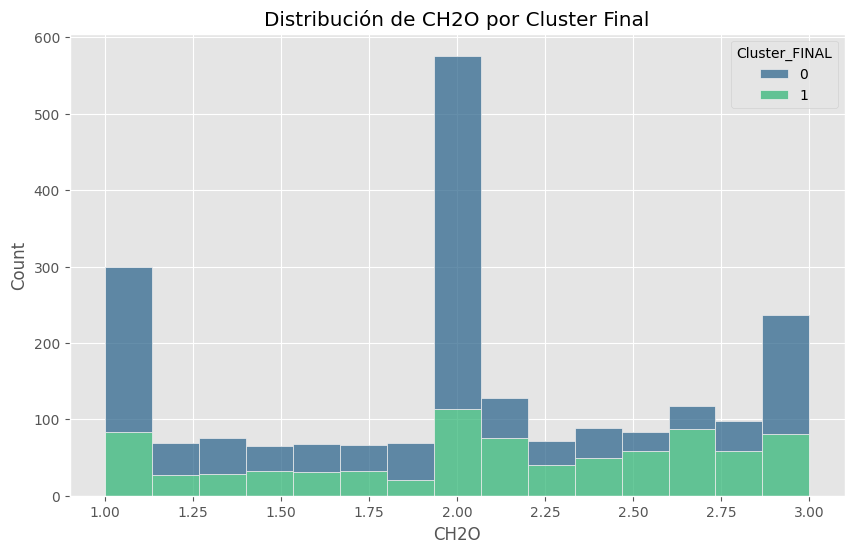

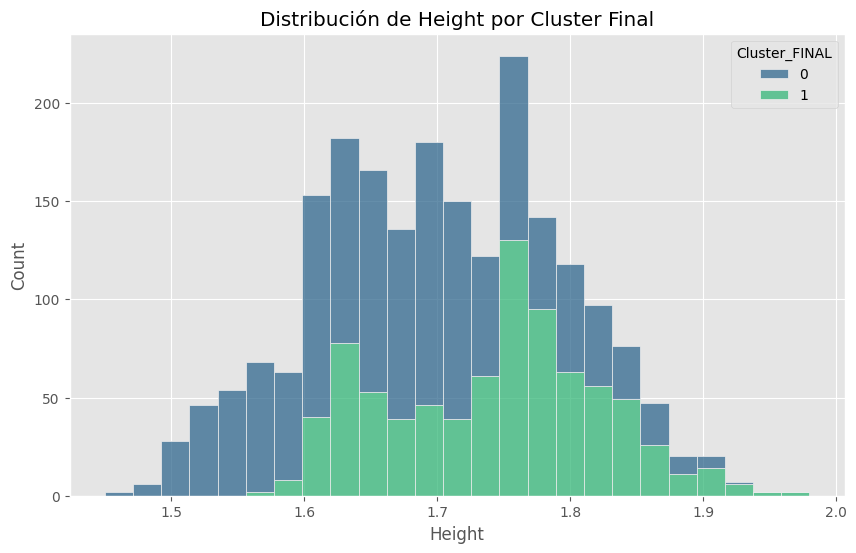

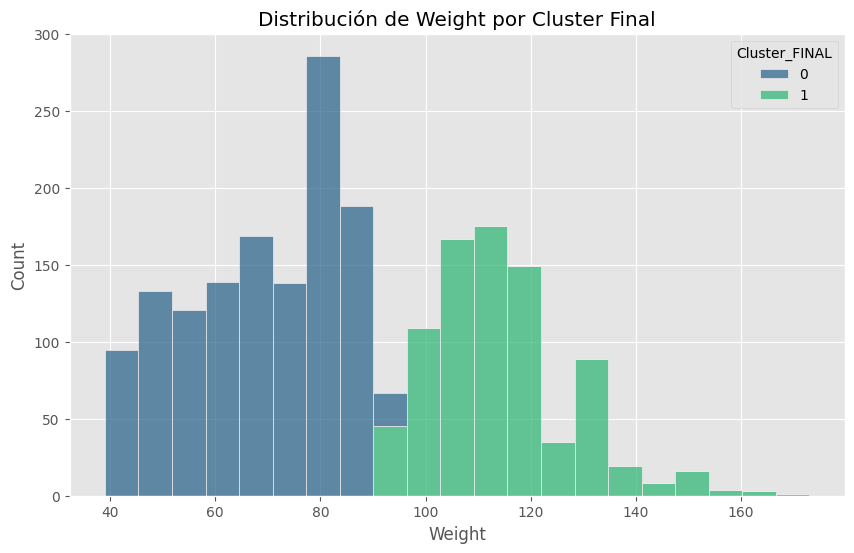

<ipython-input-40-28c5bed775b5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_FINAL', y=feature, data=df, palette='viridis')


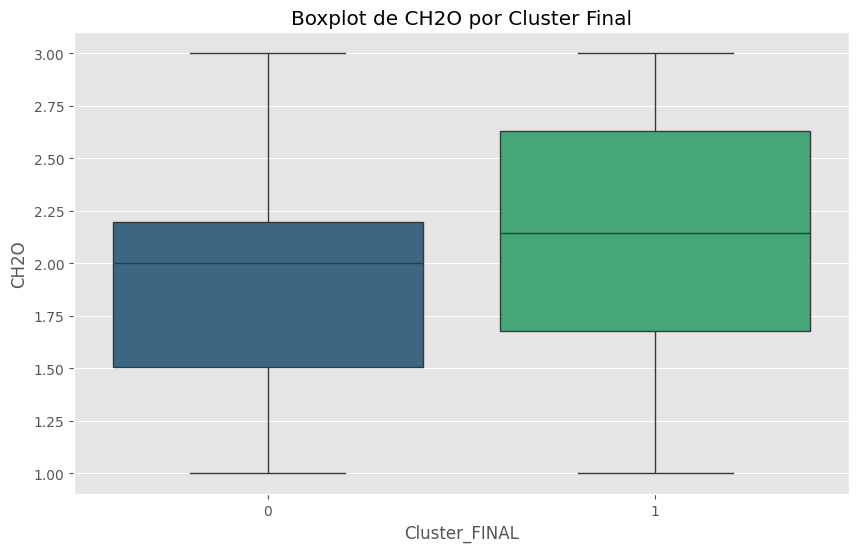

<ipython-input-40-28c5bed775b5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_FINAL', y=feature, data=df, palette='viridis')


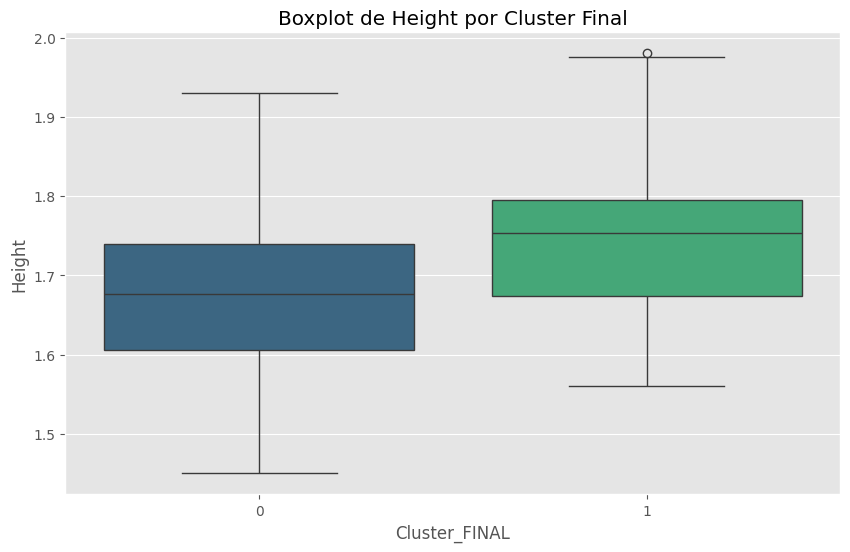

<ipython-input-40-28c5bed775b5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_FINAL', y=feature, data=df, palette='viridis')


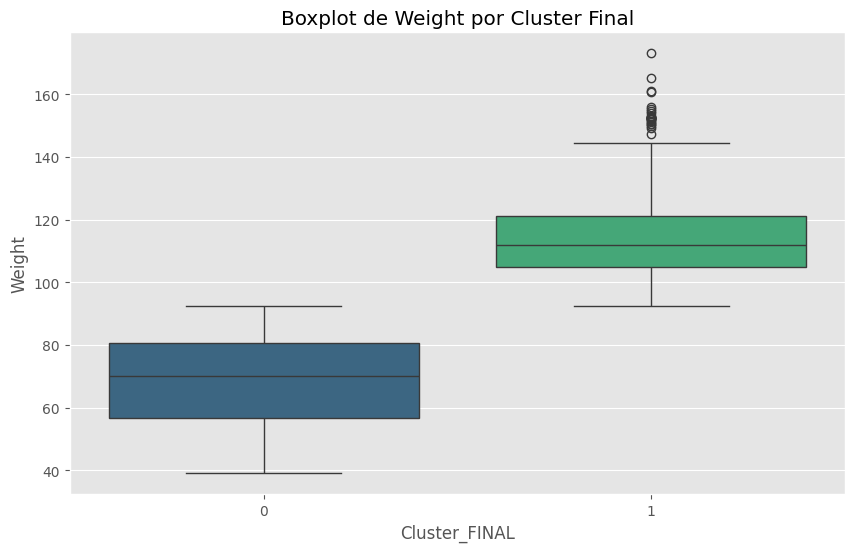

In [ ]:
# Histogramas de las variables principales por cluster final
for feature in ['CH2O', 'Height', 'Weight']:
    plt.figure(figsize=(10, 6))
    sns.histplot(df, x=feature, hue='Cluster_FINAL', multiple='stack', palette='viridis')
    plt.title(f'Distribución de {feature} por Cluster Final')
    plt.show()

# Boxplots de las variables principales por cluster final
for feature in ['CH2O', 'Height', 'Weight']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster_FINAL', y=feature, data=df, palette='viridis')
    plt.title(f'Boxplot de {feature} por Cluster Final')
    plt.show()


## Analisis de Componentes Principales (PCA)

**Normalizacion de Datos**

In [ ]:
# Los datos categoricos ya han sido one hot encoded
# Falta la normalizacion de los datos numericos
numeric_cols = ['Age', 'Height', 'Weight', 'FAF', 'TUE'] #columnas que representan datos numericos

df_numeric = df[numeric_cols]
df_categoric = df.drop(columns=numeric_cols)

scaler = StandardScaler()
df_numeric_scaled = scaler.fit_transform(df_numeric)

df_numeric_scaled = pd.DataFrame(df_numeric_scaled, columns=numeric_cols, index = df.index)

In [ ]:
df_numeric_scaled.head()

,Age,Height,Weight,FAF,TUE
0,-0.522124,-0.875589,-0.862558,-1.188039,0.561997
1,-0.522124,-1.947599,-1.168077,2.339750,-1.080625
2,-0.206889,1.054029,-0.366090,1.163820,0.561997
3,0.423582,1.054029,0.015808,1.163820,-1.080625
4,-0.364507,0.839627,0.122740,-1.188039,-1.080625


In [ ]:
df = pd.concat([df_numeric_scaled, df_categoric], axis = 1)
df.head()

,Age,Height,Weight,FAF,TUE,Gender_Female,Gender_Male,family_history_with_overweight,FAVC,FCVC,...,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transport,MTRANS_Walking,Obesity_Level,Cluster_4,Cluster_10,Cluster_FINAL
0,-0.522124,-0.875589,-0.862558,-1.188039,0.561997,1.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3,3,0
1,-0.522124,-1.947599,-1.168077,2.339750,-1.080625,1.0,0.0,1.0,0.0,3.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2,2,0
2,-0.206889,1.054029,-0.366090,1.163820,0.561997,0.0,1.0,1.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,1.0,3,3,0
3,0.423582,1.054029,0.015808,1.163820,-1.080625,0.0,1.0,0.0,0.0,3.0,...,2.0,0.0,0.0,0.0,0.0,1.0,5.0,3,3,0
4,-0.364507,0.839627,0.122740,-1.188039,-1.080625,0.0,1.0,0.0,0.0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,6.0,3,3,0




**PCA con 2 componentes**

In [ ]:
# Crear un objeto PCA y ajustar los datos
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(df)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df.head()

,PC1,PC2
0,0.939726,2.714080
1,1.978846,2.961468
2,1.300960,2.585098
3,1.946543,-1.237497
4,1.886713,-2.264387


In [ ]:
y = pd.Series(y)
y

0       1
1       1
2       1
3       5
4       6
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Length: 2111, dtype: int64

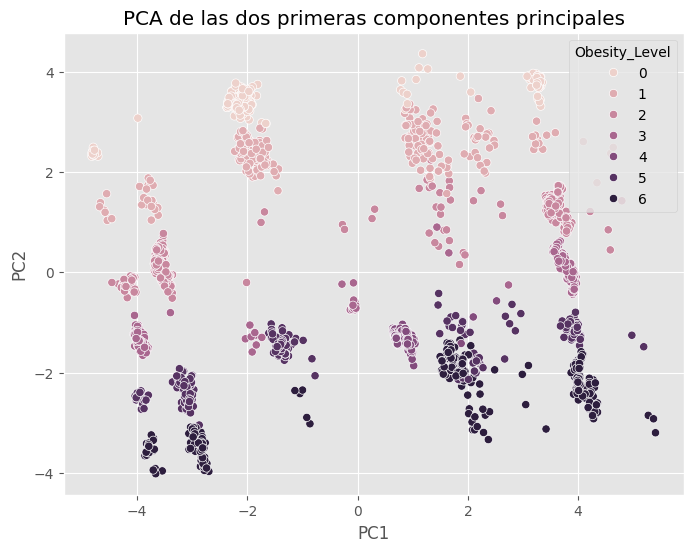

In [ ]:
pca_df['Obesity_Level'] = y # agregar variable objetivo al df de pca

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Obesity_Level', data=pca_df)
plt.title('PCA de las dos primeras componentes principales')
plt.show()

In [ ]:
print('Cantidad de varianza explicada por las 2 primeras componentes principales:', pca.explained_variance_ratio_)

Cantidad de varianza explicada por las 2 primeras componentes principales: [0.39468675 0.20490398]


En conjunto, los dos primeros componentes principales explican alrededor del 60% de la varianza total

In [ ]:
# --------- SIGUIENTES PASOS ----------
# Implementa PCA para el dataset y vuelve a llevar a cabo el clustering utilizando únicamente 2 o 3 componentes principales. Genera las visualizaciones correspondientes.
# Compara los resultados obtenidos sin PCA vs. con PCA.
# De acuerdo a todos los experimentos realizados, reporta tus conclusiones sobre el método que te pareció más adecuado para entender el dataset.

## Clustering utilizando PCA


In [ ]:
# Implementación K-means
kmeans_pca = KMeans(n_clusters=7, n_init='auto')
kmeans_pca.fit(principal_components)
labels_pca = kmeans_pca.predict(principal_components)



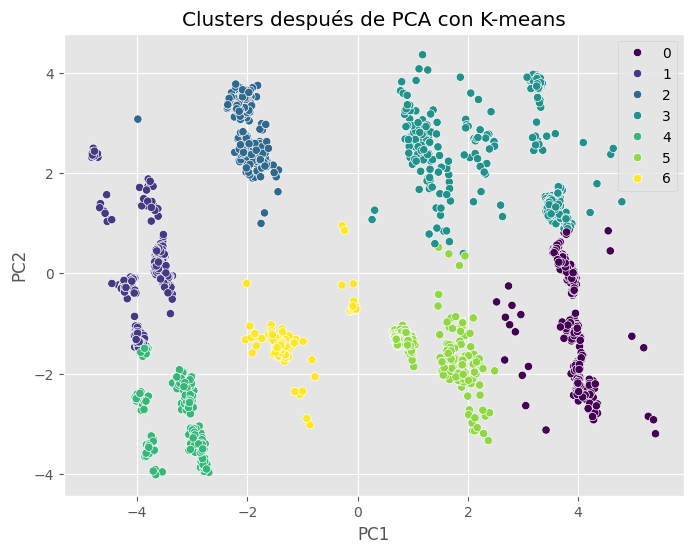

In [ ]:
# Visualización de los clusters después de PCA
plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1", y="PC2", hue=labels_pca, palette="viridis", data=pca_df)
plt.title("Clusters después de PCA con K-means")
plt.show()

In [ ]:
# Calcular el índice de silueta para el clustering después de PCA
silhouette_pca = silhouette_score(principal_components, labels_pca)
print("Silhouette Score del clustering después de PCA con K-means:", silhouette_pca)

Silhouette Score del clustering después de PCA con K-means: 0.5783434457522155


In [ ]:
# Comparación de Silhouette Score
silhouette_original = silhouette_score(X, labels)
print("Silhouette Score del clustering original con K-means:", silhouette_original)
print("Silhouette Score del clustering después de PCA con K-means:", silhouette_pca)

Silhouette Score del clustering original con K-means: 0.39358633805024945
Silhouette Score del clustering después de PCA con K-means: 0.5783434457522155


In [ ]:
# Implementacion GMM
gmm_pca = GaussianMixture(n_components=4, covariance_type="spherical", random_state=42)
gmm_pca.fit(principal_components)
labels_gmm_pca = gmm_pca.predict(principal_components)

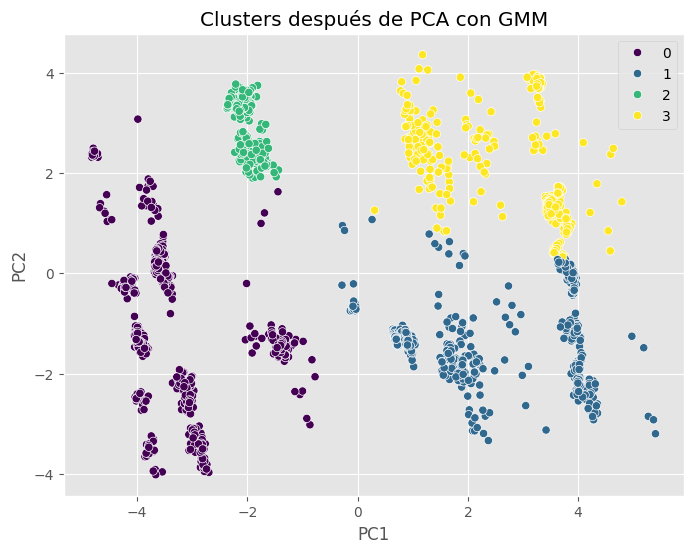

In [ ]:
# Visualización de los clusters con GMM
plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1", y="PC2", hue=labels_gmm_pca, palette="viridis", data=pca_df)
plt.title("Clusters después de PCA con GMM")
plt.show()

In [ ]:
# Calcular el índice de silueta para el clustering después de PCA con GMM
silhouette_gmm_pca = silhouette_score(principal_components, labels_gmm_pca)

In [ ]:
# Comparación de Silhouette Scores y análisis final
print("Silhouette Score del clustering original con K-means:", silhouette_original)
print("Silhouette Score del clustering después de PCA con K-means:", silhouette_pca)
print("Silhouette Score del clustering después de PCA con GMM:", silhouette_gmm_pca)

Silhouette Score del clustering original con K-means: 0.39358633805024945
Silhouette Score del clustering después de PCA con K-means: 0.5783434457522155
Silhouette Score del clustering después de PCA con GMM: 0.5192066649144277


## Conclusiones

* K-means Clustering fue uno de los métodos evaluados. Utilizando el método del codo y se determinó que el número óptimo de clusters era 7. Este valor fue encontrado mediante la observación de la gráfica, la cual  mostró una disminución notable en el crecimiento. Sin embargo, al explorar diferentes combinaciones de hiperparámetros, se descubrió que los mejores resultados, en términos de índice de silueta, se obtenían con la inicialización k-means++, utilizando 5 clusters y un máximo de 300 iteraciones. Sin embargo, aunque al aumentar el número de clusters mejoró la precisión hasta cierto punto, posteriormente, esta disminuyó, especialmente con un número muy alto de clusters. En general, la visualización de los clusters mostró agrupaciones razonables, pero con algunas superposiciones, indicando que 7 clusters proporcionaban una segmentación aceptable, aunque no perfecta.


* En cuanto al Modelo de Mezcla Gaussiana (GMM), la selección del número de componentes se realizó utilizando el criterio de información bayesiana. Inicialmente, se identificó que el número óptimo de componentes era 4, pero el punto más bajo de BIC se alcanzó con 10 componentes. Para 4 componentes, los clusters mostraron agrupaciones razonables, aunque con superposiciones significativas. Con 10 componentes, la segmentación fue más precisa y detallada, aunque la interpretación se volvió más compleja. En la comparación de hiperparámetros, la covarianza esférica con 2 componentes produjo los mejores resultados en términos de índice de silueta, sugiriendo que esta estructura era más adecuada para el dataset.

* El Análisis de Componentes Principales (PCA) mostró que las dos primeras componentes principales explicaban alrededor del 60% de la varianza total del dataset. Después de aplicar PCA, el clustering se realizó nuevamente utilizando K-means y GMM. El índice de silueta para K-means después de aplicar PCA fue de 0.578, significativamente mayor que el clustering original (0.393). Para GMM, el índice de silueta después de PCA fue de 0.519, también mejor que el clustering original, pero menor que K-means después de PCA. \\
Por lo tanto, determinamos que el método más adecuado para entender el dataset fue K-means Clustering después de aplicar PCA. Esto se refleja en el índice de silueta más alto (0.578) en comparación con los métodos de clustering originales y después de PCA con GMM. La reducción de dimensionalidad con PCA no solo ayudó a mejorar la segmentación de los clusters, sino que también facilitó la visualización y la interpretación de los resultados. Por lo tanto, se recomienda realizar primero una reducción de dimensionalidad con PCA y luego aplicar K-means Clustering para una segmentación más efectiva y comprensible del dataset.